In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

import Dense
import Sigmoid
import LogLoss
import mse

In [2]:
# подготовка
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)
with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)
rng = 30
np.random.seed(rng)
# готово

# нормируем данные
mean = np.mean(train['data'], axis = 0)
#print(type(mean))
std = np.std(train['data'], axis = 0)
train['data'] = (train['data'] - mean) / (std + 0.00001) # standart data
#train['data'] = (train['data'] - 0) / (256 + 0.00001) #upd: Решил сделать от 0 до 1, тк в другом случае сетка не училась, не знаю, почему
train['labels'] -= 5
train['labels'][train['labels']==0] = -1
# теперь данные нормальные

#делим данные на тренировку и тест
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels \
    = train_test_split(train['data'], train['labels'], random_state=rng, test_size = 0.1)

#создаем модель здесь, чтобы она не пересоздавалась при обучении
tr_eval = []
te_eval = []

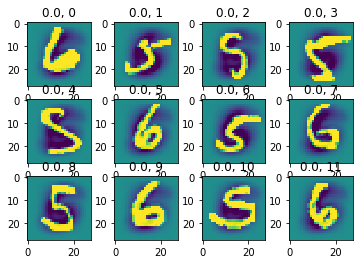

In [3]:
n = 4
for i in range(n*(n-1)):
    plt.subplot(n-1, n, i+1)
    q=np.random.randint(0, train_data.shape[0])
    plt.imshow(train_data[i].reshape(28,28))
    plt.title("%.1f, %d" % (0, i))

In [4]:
class net2:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 1, 0.01)
        self.a1 = Sigmoid.Sigmoid()
        self.loss_ = LogLoss.LogLoss()
    
    def loss(self, x, y):
        return self.loss_.forward(x, y)
    
    def forward(self, x, label=None, prnt=False):
        x = self.d1.forward(x)
        if prnt:
            print(x)
        x = self.a1.forward(x)
        if prnt:
            print(x)
        if label is None:
            return x
        return self.loss_.forward(x, label)
    
    def backward(self):
        loss = self.loss_.backward()
        loss = self.a1.backward(loss)
        loss = self.d1.backward(loss)
        
        
class net3:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 1, 0.00001)
        self.loss_ = mse.mse()
    
    def loss(self, x, y):
        return self.loss_.forward(x, y)
    
    def forward(self, x, label=None, prnt=False):
        x = self.d1.forward(x)
        if prnt:
            print(x)
        if label is None:
            return x
        return self.loss_.forward(x, label)
    
    def backward(self):
        loss = self.loss_.backward()
        loss = self.d1.backward(loss)
my_first_model = net3()

In [5]:
chosen_index = np.random.randint(0, train_data.shape[0])
tr_eval.append(my_first_model.forward(train_data[0], train_labels[0]))
my_first_model.backward()

In [6]:
# Реализуйте здесь обучение модели
import time
#print(my_first_net.shape, 3)
start = time.monotonic()
test_loss = 1
min_loss = 1
end = start
epochs = 0
while(test_loss > 0 and end - start < 300 and epochs < 5):
    #train
    for i in range(train_data.shape[0]):
        chosen_index = np.random.randint(0, train_data.shape[0])
        my_first_model.forward(train_data[chosen_index], train_labels[chosen_index])
        my_first_model.backward()
        
    correct = 0
    for i in range(train_data.shape[0]):
        ans = my_first_model.forward(train_data[i])
        if (ans < 0 and train_labels[i] < 0) or (ans > 0 and train_labels[i] > 0):
            correct += 1
    
    
    end = time.monotonic()
    print('time is  : {:>9.2f}'.format(end - start), 'correct:', correct/train_data.shape[0])
    epochs += 1
    
#plt.imshow(my_first_model.d1.mt.reshape(28,28))
end = time.monotonic()
print('time is  : {:>9.2f}'.format(end - start))
#print(right_answers, test_loss)

time is  :      0.69 correct: 0.974
time is  :      1.37 correct: 0.9755555555555555
time is  :      2.06 correct: 0.9755555555555555
time is  :      2.73 correct: 0.9755555555555555
time is  :      3.42 correct: 0.9752222222222222
time is  :      3.42


[1.0348526353927063]


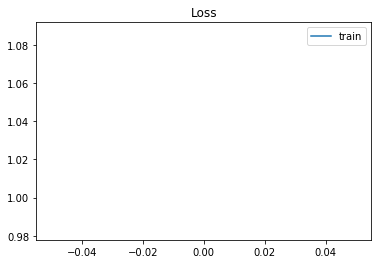

In [7]:
plt.title('Loss')
print((tr_eval))
plt.plot(tr_eval, label='train')
#plt.plot([e[0] for e in te_eval], label='test')
plt.legend()

IndexError: invalid index to scalar variable.

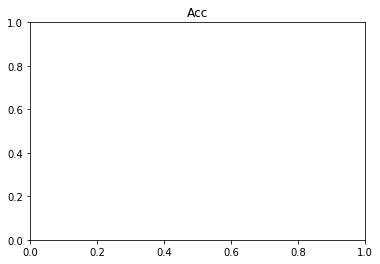

In [8]:
plt.title('Acc')
plt.plot([e[1] for e in tr_eval], label='train')
plt.plot([e[1] for e in te_eval], label='test')
plt.legend()

In [ ]:
X = test_no_lables['data']
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X_new = (X - mean) / (std + 0.00001)

# compute Y_pred
Y_pred = []
for i in range(X_new.shape[0]):
    net_response = my_first_model.forward(X_new[i])
    Y_pred.append(net_response)

[[-0.63239066]]
[[0.97006762]]
[[0.99969217]]
[[-0.6623572]]


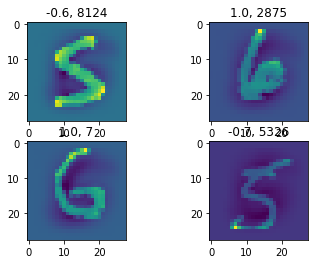

In [12]:
n = 2
for i in range(n*n):
    plt.subplot(n, n, i+1)
    q=np.random.randint(0, train_data.shape[0])
    plt.imshow(train_data[q].reshape(28,28))
    plt.title("%.1f, %d" % (my_first_model.forward(train_data[q], prnt=True), q))
    


In [ ]:
plt.imshow(train_data[3349].reshape(28,28))

[[ 1.34374587e-04 -2.00158712e-03 -1.94324293e-03 -2.50152363e-03
  -1.82510919e-03 -6.88185476e-06  8.49242582e-04 -5.10260911e-03
  -3.94688822e-03 -3.58825002e-03 -2.59345149e-03  1.04863007e-03
  -1.70286304e-03 -2.12352351e-03 -4.29534886e-03 -2.68343614e-03
   1.97721399e-03  2.01229095e-03 -1.55050512e-03 -6.65051591e-04
   5.91665067e-03  8.44679421e-04 -1.81868166e-03 -7.80933070e-04
  -3.29798392e-03  2.04220292e-03 -6.23772930e-03 -2.86383601e-03]
 [ 5.27596544e-03  5.99633205e-04 -2.82347972e-03 -3.04784289e-03
   5.15490233e-04  3.12998581e-03  1.53274934e-03 -2.38284008e-03
   3.05751632e-03 -7.53988818e-04 -1.15181094e-03  8.93229147e-04
   3.55057885e-03  7.71269075e-04  2.49533966e-03  3.27125018e-03
   4.59243867e-03  1.99772056e-03  2.20963892e-03  1.93135484e-03
   2.66643490e-03 -4.81484405e-05 -2.84905924e-03  4.58521558e-03
  -2.13942352e-03 -1.42266281e-03 -6.99048249e-04 -8.82862184e-04]
 [-6.84221624e-04  2.57981832e-03 -1.87465014e-03  3.54038955e-03
  -2.037

  -4.17829574e-03 -2.66634143e-03  2.07832091e-03 -5.45559796e-04]]


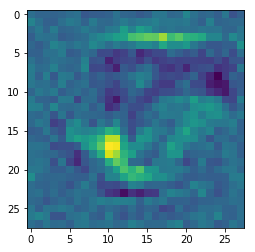

In [9]:
plt.imshow(my_first_model.d1.mt.reshape(28,28))
print(my_first_model.d1.mt.reshape(28,-1))

[[-4518.58633936]] [[185988.71361825]]


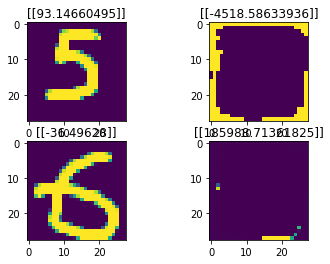

In [15]:
img1 = PIL.Image.open('tmp.bmp').convert('L')
img1 = np.array(img1)
img1 = 256-img1
img1 = img1.reshape(-1)
img1loaded = (img1 - mean)/(std + 1e-5)

res1 = my_first_model.forward(img1)+5
res1_ = my_first_model.forward(img1loaded)+5

plt.subplot(2, 2, 1)
plt.imshow(img1.reshape(28,28))
plt.title(res1)
plt.subplot(2, 2, 2)
plt.imshow(img1loaded.reshape(28,28))
plt.title(res1_)

img2 = PIL.Image.open('tmp2.bmp').convert('L')
img2 = np.array(img2)
img2 = 256-img2
img2 = img2.reshape(-1)
img2loaded = (img2 - mean)/(std + 1e-5)

res2= my_first_model.forward(img2)+5
res2_ = my_first_model.forward(img2loaded)+5

plt.subplot(2, 2, 3)
plt.imshow(img2.reshape(28,28))
plt.title(res2)
plt.subplot(2, 2, 4)
plt.imshow(img2loaded.reshape(28,28))
plt.title(res2_)

print(res1_, res2_)